# **EN3160 Assignment 2 on Fitting and Alignment**
200417M NAZAR F. S. | https://github.com/Saeedha-N/Fitting-and-Alignment-Assignment

In [ ]:
#Q1


Explanation

In [ ]:
#Q2

Explanation

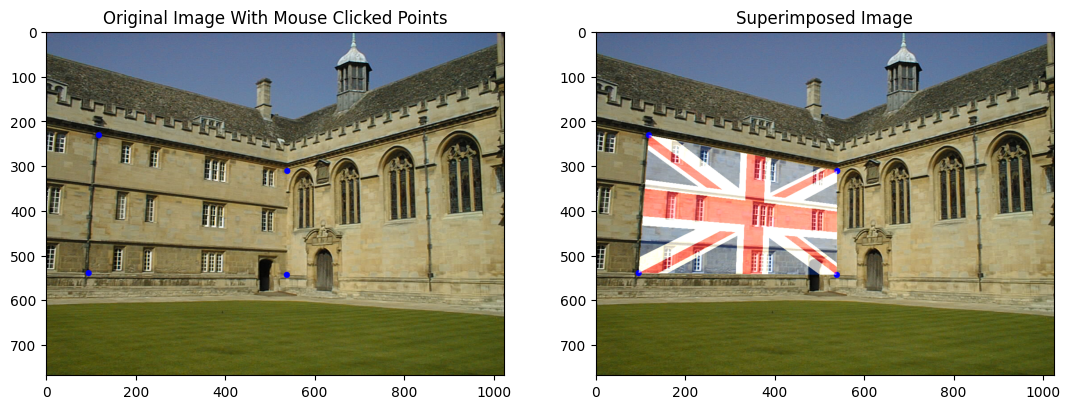

In [1]:
#Q3
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

counter = 0 # Counter to keep track of the number of points clicked
number_of_points = 4 # Maximum number of points to be clicked
building_points = np.empty((number_of_points,2)) # Empty array to store the points clicked

# Load the building and flag images
building = cv.imread('building.jpg', cv.IMREAD_COLOR)
UK_flag = cv.imread('UK_flag.png', cv.IMREAD_COLOR)

# Define mouse callback function to get the mouse points of the building image
def draw_circle(event, x, y, flags, img): # Event is the type of mouse event, x and y are the coordinates of the mouse pointer, flags is the additional flags associated with the image, img is the user-defined building that is passed
    global counter
    if event == cv.EVENT_LBUTTONDOWN: # Checks if left mouse button is pressed
        cv.circle(img, (x,y), 7, (255, 0, 0), -1) # Draws a circle at the mouse pointer, -1 means the circle should be filled, (255, 0, 0) is the blue color of the circle in BGR
        building_points[counter] = (x,y) 
        counter += 1

# Getting the mouse points of the building image
cv.namedWindow('Base Image', cv.WINDOW_AUTOSIZE) # Creates a window with the name 'Base Image'
cv.setMouseCallback('Base Image', draw_circle, building) # Calls the callback function when a mouse event occurs, building is the user-defined parameter that is passed
while(True):
    cv.imshow('Base Image', building) 
    if counter == number_of_points: # Checks if the number of points clicked is equal to the maximum number of points
        break
    if cv.waitKey(20) & 0xFF == 27: # Checks if the 'Esc' key is pressed
        break

# Define the corresponding points on the flag image
flag_points = np.array([[0, 0], [UK_flag.shape[1], 0], [UK_flag.shape[1], UK_flag.shape[0]], [0, UK_flag.shape[0]]], dtype=np.float32)

# Find the homography matrix
homography_matrix, _ = cv.findHomography(flag_points, building_points)

# Warp the flag image to match the the building points using the homography matrix
flag_warped = cv.warpPerspective(UK_flag, homography_matrix, (building.shape[1], building.shape[0]))

# Blend the two images
blended_image = cv.addWeighted(building, 1, flag_warped, 0.7, 0)

# Display the result using OpenCV
cv.imshow('Superimposed Image', blended_image)
cv.imwrite('superimposed_flag_building.png', blended_image) # Save the image
cv.waitKey(0)
cv.destroyAllWindows()

# Display the mouse clicked original and superimposed image using matplotlib
plt.figure(figsize=(13, 13)), plt.subplot(1,2,1), plt.imshow(cv.cvtColor(building, cv.COLOR_BGR2RGB)) # The last parameter in plt.subplot() is the current index of the subplot
plt.title('Original Image With Mouse Clicked Points')
plt.subplot(1,2,2), plt.imshow(cv.cvtColor(blended_image, cv.COLOR_BGR2RGB)), plt.title('Superimposed Image')
plt.show()

When the mouse points are NOT clicked in order (i.e. clockwise or anti-clockwise) the flag gets superimposed outside the rectangular shape given by the mouse clicked points. 

The interactive point selection on the building image helps conveniently define a planar surface for precise superimposition. The computed homography matrix effectively corrects perspective differences, ensuring that the UK flag image seamlessly integrates with the building.

In [ ]:
#Q4
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

